<h2>Image Thresholding and seed Concept</h2>

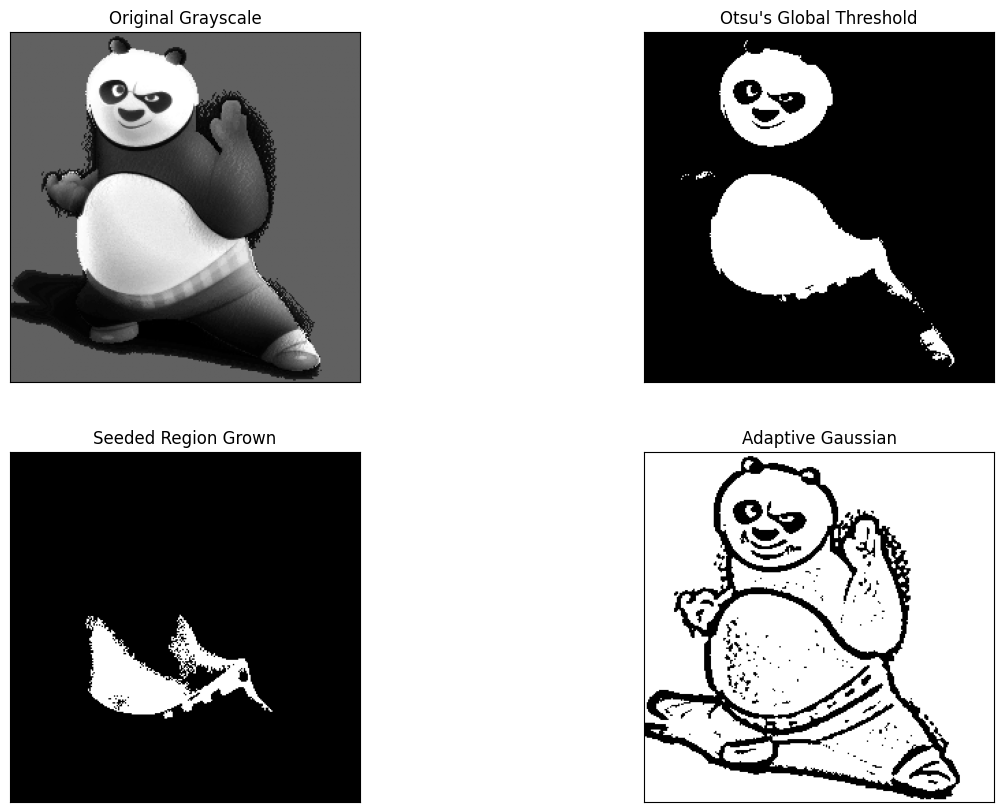

Seed Point (x, y): (128, 128)
Seed Intensity: 200
Region Growing Tolerance: +/- 30
Otsu's automatically calculated threshold: 148.00


In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('panda.png', cv2.IMREAD_GRAYSCALE)
# Define the seed point (center of the image for simplicity)
SEED_POINT = (img.shape[1] // 2, img.shape[0] // 2) 

# Define the threshold/tolerance for region growing
GROW_THRESHOLD = 30 
# For adaptive thresholding (optional blur for better results)
img_blurred = cv2.GaussianBlur(img, (5, 5), 0)

# --- 2. Region Growing Function (The "Seed Concept") ---

def seeded_region_grow(image, seed_point, tolerance):
    """
    Performs region growing based on a seed point and a threshold tolerance.
    """
    height, width = image.shape
    segmented_img = np.zeros((height, width), dtype=np.uint8)

    # Initialize a list of pixels to check (the 'seed' queue)
    pixels_to_check = [seed_point]
    
    # Get the intensity of the initial seed
    # Use 'int()' to ensure the comparison works correctly even if numpy types are different
    seed_intensity = int(image[seed_point[1], seed_point[0]])
    
    segmented_img[seed_point[1], seed_point[0]] = 255 

    # Define 8-neighbor connectivity
    neighbors = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]

    # Main growth loop
    while pixels_to_check:
        x, y = pixels_to_check.pop(0) 

        for dx, dy in neighbors:
            nx, ny = x + dx, y + dy

            # Boundary and check if already segmented
            if 0 <= nx < width and 0 <= ny < height and segmented_img[ny, nx] == 0:
                
                # Similarity Criterion (Thresholding)
                if abs(int(image[ny, nx]) - seed_intensity) <= tolerance:
                    
                    # Add to the segmented region and the queue
                    segmented_img[ny, nx] = 255
                    pixels_to_check.append((nx, ny))

    return segmented_img

# --- 3. Apply Segmentation Methods ---

# A. Seeded Region Growing
thresh_region_grown = seeded_region_grow(img, SEED_POINT, GROW_THRESHOLD)

# B. Global Thresholding (Otsu's)
ret_otsu, thresh_otsu = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Calculates a LOCAL threshold based on a 11x11 neighborhood (BlockSize=11)
# and subtracts a constant C=2 from the calculated mean.
thresh_adaptive = cv2.adaptiveThreshold(
    img_blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    cv2.THRESH_BINARY, 11, 2
)

# --- 4. Display the results ---

titles = [
    'Original Grayscale', 
    'Otsu\'s Global Threshold', 
    'Seeded Region Grown', 
    'Adaptive Gaussian'
]
images = [
    img, 
    thresh_otsu, 
    thresh_region_grown, 
    thresh_adaptive
]

# Create a copy to mark the seed location
img_with_seed = img.copy()
# Use a contrast color for the seed, e.g., 255 (white)
cv2.circle(img_with_seed, SEED_POINT, 5, 255, 2) 
images.append(img_with_seed)


plt.figure(figsize=(15, 10))
for i in range(4):
    plt.subplot(2, 2, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

print(f"Seed Point (x, y): {SEED_POINT}")
print(f"Seed Intensity: {img[SEED_POINT[1], SEED_POINT[0]]}")
print(f"Region Growing Tolerance: +/- {GROW_THRESHOLD}")
print(f"Otsu's automatically calculated threshold: {ret_otsu:.2f}")